## Cluster Analysis
<hr>

### Agenda
1. Introduction to Unsupervised Learning
2. Clustering
3. Similarity or Distance Calculation
4. Clustering as an Optimization Function
5. Types of Clustering Methods
6. Partitioning Clustering - KMeans & Meanshift
7. Hierarchial Clustering - Agglomerative
8. Density Based Clustering - DBSCAN
9. Measuring Performance of Clusters
10. Comparing all clustering methods

<hr>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
from sklearn.datasets import make_blobs

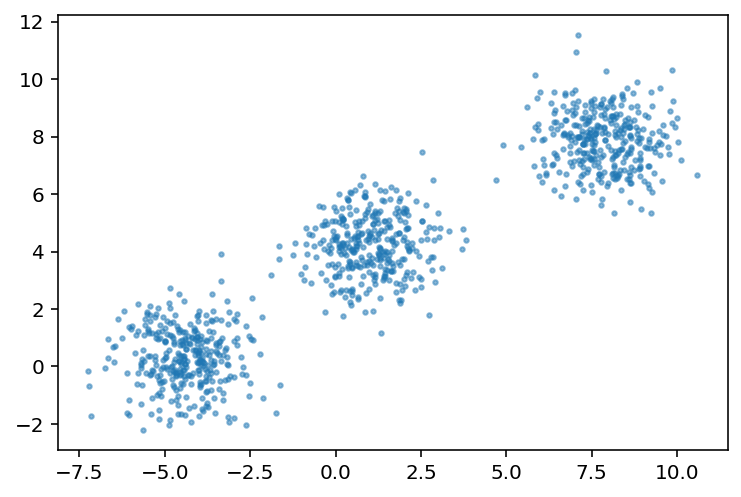

In [7]:
X,y = make_blobs(n_features=2, n_samples=1000, centers=3, 
                 cluster_std=1, random_state=3)       # Generate isotropic Gaussian blobs for clustering
plt.scatter(X[:,0], X[:,1], s=5, alpha=.5)

### 3. Distance or Similarity Function (유사도)
* Data belonging to same cluster are similar & data belonging to different cluster are different. 
* We need mechanisms to measure similarity & differences between data. 
* This can be achieved using any of the below techniques.

 - Minkowiski breed of distance calculation: 
 
 <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4060cc840aeab9e41b5e47356088889e2e7a6f0f">
 
 - Manhatten (p=1), Euclidian (p=2)
 
 - Cosine: Suited for text data
 
 <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1d94e5903f7936d3c131e040ef2c51b473dd071d"> 

In [8]:
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances,manhattan_distances

In [9]:
X = [[0, 1], [1, 1]]
euclidean_distances(X, X)

array([[0., 1.],
       [1., 0.]])

In [10]:
euclidean_distances(X, [[0,0]])

array([[1.        ],
       [1.41421356]])

In [11]:
cosine_distances(X,X)

array([[0.        , 0.29289322],
       [0.29289322, 0.        ]])

In [12]:
manhattan_distances(X,X)

array([[0., 1.],
       [1., 0.]])

### 5. Types of Clustering
* Partitioning methods
  - Partitions n data into k partitions
  - Initially, random partitions are created & gradually data is moved across different partitions.
  - It uses distance between points to optimize clusters.
  - KMeans & Meanshift are examples of Partitioning methods
* Hierarchical methods
  - These methods does hierarchical decomposition of datasets.
  - One approach is, assume each data as cluster & merge to create a bigger cluster
  - Another approach is start with one cluster & continue splitting
* Density-based methods
  - All above techniques are distance based & such methods can find only spherical clusters and not suited for clusters of other shapes.
  - Continue growing the cluster untill the density exceeds certain threashold.

### 6. Partitioning Method
#### KMeans
* Minimizing creteria : within-cluster-sum-of-squares.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/kmeans2.png?raw=true">

* The centroids are chosen in such a way that it minimizes within cluster sum of squares.

* The k-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean  of the samples in the cluster. $\mu$

<img src="https://cssanalytics.files.wordpress.com/2013/11/cluster-image.png" width="300px">

##### KMeans Algorithm
1. Initialize k centroids.
2. Assign each data to the nearest centroid, these step will create clusters.
3. Recalculate centroid - which is mean of all data belonging to same cluster.
4. Repeat steps 2 & 3, till there is no data to reassign a different centroid.

Animation to explain algo - http://tech.nitoyon.com/en/blog/2013/11/07/k-means/

In [13]:
from sklearn.datasets import make_blobs, make_moons

X,y = make_blobs(n_features=2, n_samples=1000, cluster_std=0.5)   
# n_featues: no of features for each sample
# cluster_std: The standard deviation of the clusters.
plt.scatter(X[:,0], X[:,1],s=10)

In [14]:
from sklearn.cluster import KMeans, MeanShift

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

In [16]:
kmeans.predict(X)

array([1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0,
       1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2, 2,
       2, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1, 0, 2,
       0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 0, 1, 2, 1,
       0, 2, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 2,
       2, 0, 1, 0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 2, 0, 2, 2, 0, 2, 2, 2, 1,
       2, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 0,
       1, 2, 0, 2, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1,
       2, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 2, 1, 2, 0, 0, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 2, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1,
       0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 2,
       0, 2, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1,
       1, 1, 0, 1, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 0, 0, 1, 1, 1, 2,
       1, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 1,

#### Meanshift
* it iteratively shifts each point in the data set until it the top of its nearest KDE surface peak. 
* Mean shift exploits this KDE idea by imagining what the points would do if they all climbed up hill to the nearest 
  peak on the KDE surface. It does so by iteratively shifting each point uphill until it reaches a peak.
* Centroid based hierarchical clustering algorithm.(also known as mode-seeking algorithm)
* Mode can be understood as highest density of data points.
* Mean Shift is a hierarchical clustering algorithm. As opposed to K-Means, when using Mean Shift, you don’t need to know the number of categories (clusters) beforehand. The downside to Mean Shift is that it is computationally expensive — O(n²).
- 추정된 KDE 분포에서 가장 밀도가 높은 (mode 값) 쪽으로 이동시켜 감.

In [17]:
centers = [[1, 1], [-.75, -1], [1, -1], [-3, 2]]
X, _ = make_blobs(n_samples=1000, centers=centers, cluster_std=0.6)

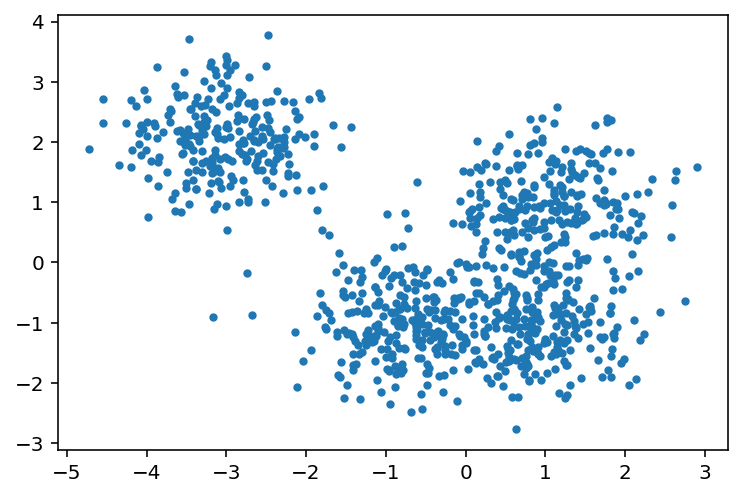

In [18]:
plt.scatter(X[:,0], X[:,1],s=10)

In [19]:
kmeans = KMeans(n_clusters=4)

In [20]:
ms = MeanShift()

In [21]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
ms.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

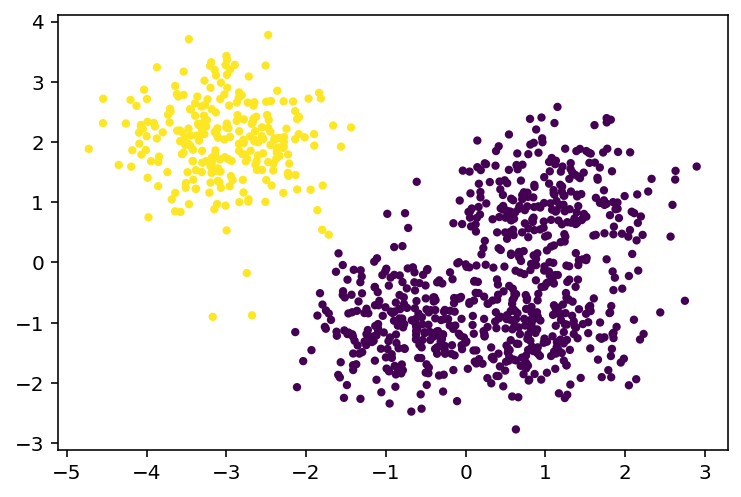

In [23]:
plt.scatter(X[:,0], X[:,1],s=10, c=ms.predict(X))

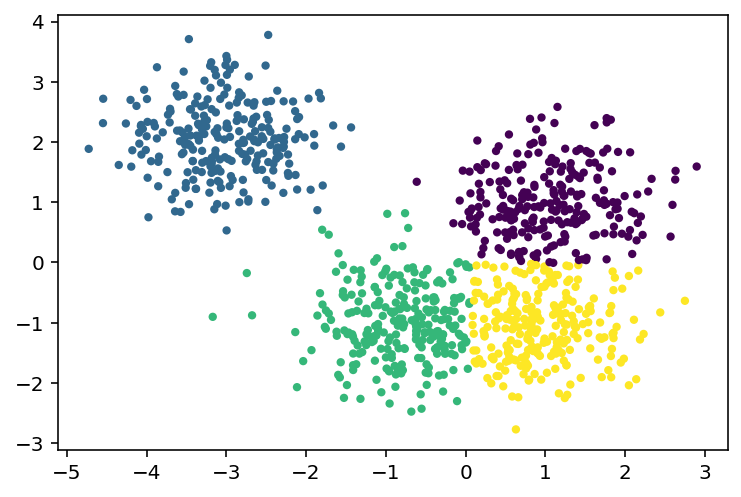

In [24]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

### 7. Hierarchial Clustering
* A method of clustering where you combine similar clusters to create a cluster or split a cluster into smaller clusters such they now they become better.
* Two types of hierarchaial Clustering
  - Agglomerative method, a botton-up approach.
  - Divisive method, a top-down approach.

#### Agglomerative method
* Start with assigning one cluster to each data. 
* Combine clusters which have higher similarity.
* Differences between methods arise due to different ways of defining distance (or similarity) between clusters. The following sections describe several agglomerative techniques in detail.
  - Single Linkage Clustering
  - Complete linkage clustering
  - Average linkage clustering
  - Average group linkage

### 8. Density Based Clustering - DBSCAN
* 

In [21]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

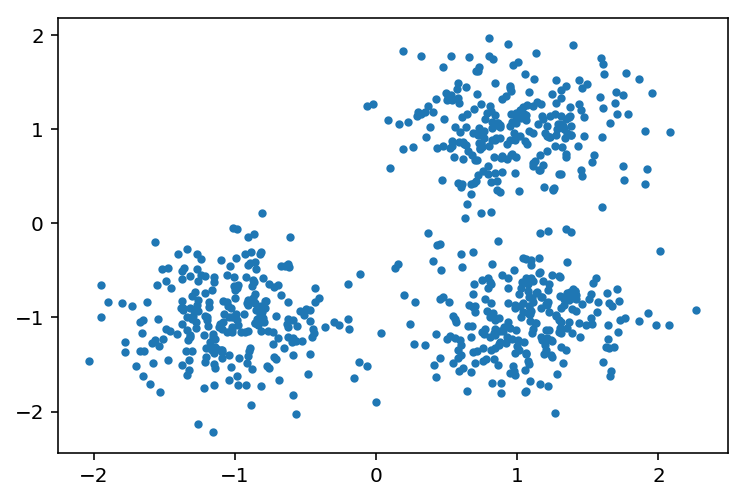

In [22]:
plt.scatter(X[:,0], X[:,1],s=10)

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# np.zeros_like(): Return an array of zeros with the same shape and type as a given array.
# core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_   # Cluster labels for each point in the dataset given to fit(). 
                      # Noisy samples are given the label -1.

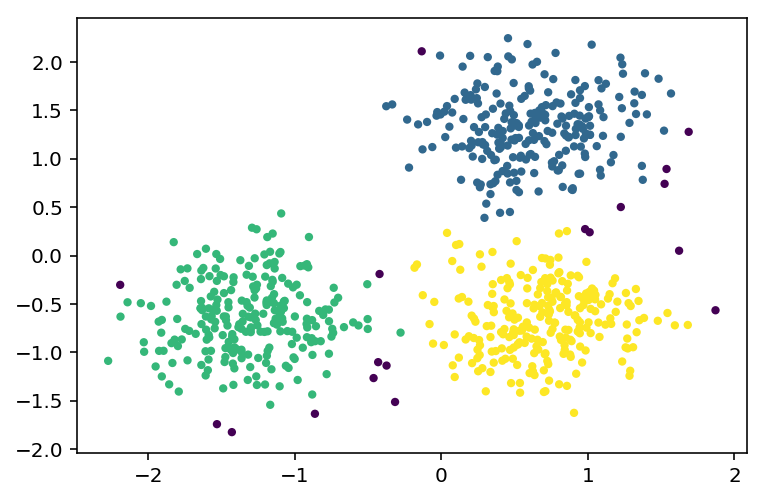

In [25]:
plt.scatter(X[:,0], X[:,1],s=10, c=labels)

In [29]:
labels

array([ 0,  1,  0,  2,  0,  1,  1,  2,  0,  0,  1,  1,  1,  2,  1,  0, -1,
        1,  1,  2,  2,  2,  2,  2,  1,  1,  2,  0,  0,  2,  0,  1,  1,  0,
        1,  0,  2,  0,  0,  2,  2,  1,  1,  1,  1,  1,  0,  2,  0,  1,  2,
        2,  1,  1,  2,  2,  1,  0,  2,  1,  2,  2,  2,  2,  2,  0,  2,  2,
        0,  0,  0,  2,  0,  0,  2,  1, -1,  1,  0,  2,  1,  1,  0,  0,  0,
        0,  1,  2,  1,  2,  2,  0,  1,  0,  1, -1,  1,  1,  0,  0,  2,  1,
        2,  0,  2,  2,  2,  2, -1,  0, -1,  1,  1,  1,  1,  0,  0,  1,  0,
        1,  2,  1,  0,  0,  1,  2,  1,  0,  0,  2,  0,  2,  2,  2,  0, -1,
        2,  2,  0,  1,  0,  2,  0,  0,  2,  2, -1,  2,  1, -1,  2,  1,  1,
        2,  2,  2,  0,  1,  0,  1,  0,  1,  0,  2,  2, -1,  1,  2,  2,  1,
        0,  1,  2,  2,  2,  1,  1,  2,  2,  0,  1,  2,  0,  0,  2,  0,  0,
        1,  0,  1,  0,  1,  1,  2,  2,  0,  0,  1,  1,  2,  1,  2,  2,  2,
        2,  0,  2,  0,  2,  2,  0,  2,  2,  2,  0,  0,  1,  1,  1,  2,  2,
        2,  2,  1,  2,  2

### 교재는 여기까지

### 9. Measuring Performance of Clusters
* Two forms of evaluation 
* supervised, which uses a ground truth class values for each sample.
  - completeness: all members of a given class are assigned to the same cluster.
  - homogeneity: each cluster contains only members of a single class.
* unsupervised, which measures the quality of model itself
  - silhoutte_score
  - calinski_harabaz_score

##### completeness_score
- A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
- Accuracy is 1.0 if data belonging to same class belongs to same cluster, even if multiple classes belongs to same cluster

In [34]:
from sklearn.metrics.cluster import completeness_score, homogeneity_score

In [35]:
completeness_score( labels_true=[10,10,11,11],labels_pred=[1,1,0,0])

1.0

In [36]:
homogeneity_score( labels_true=[10,10,11,11],labels_pred=[1,1,0,0])

1.0

* The acuracy is 1.0 because all the data belonging to same class belongs to same cluster

In [37]:
completeness_score( labels_true=[11,22,22,11],labels_pred=[1,0,1,1])

0.3836885465963443

In [38]:
homogeneity_score( labels_true=[11,22,22,11],labels_pred=[1,0,1,1])

0.31127812445913283

* The accuracy is .3 because class 1 - [11,22,11], class 2 - [22]  

In [32]:
print(completeness_score([10, 10, 11, 11], [0, 0, 0, 0]))

1.0


##### homogeneity_score
- A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

In [44]:
from sklearn.metrics.cluster import homogeneity_score

In [45]:
homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [46]:
homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3])

0.9999999999999999

In [47]:
homogeneity_score([0, 0, 0, 0], [1, 1, 0, 0])

1.0

* Same class data is broken into two clusters

#### silhoutte_score
* The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.
* The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

##### Example : Selecting the number of clusters with silhouette analysis on KMeans clustering

In [48]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

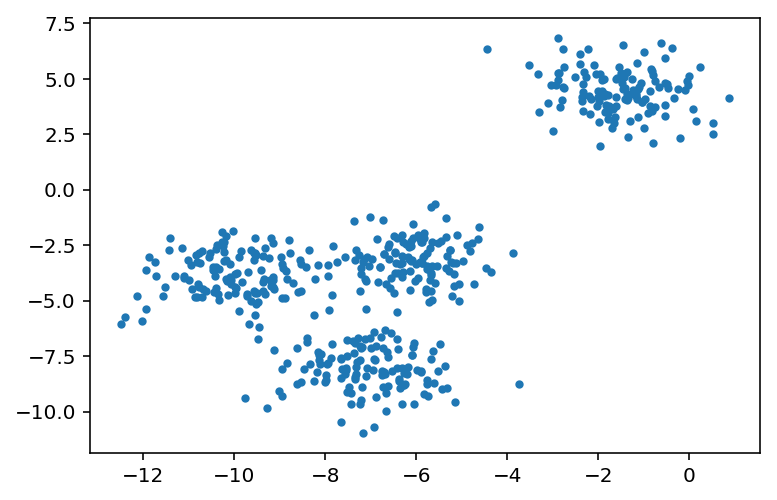

In [49]:
plt.scatter(X[:,0],X[:,1],s=10)

In [50]:
range_n_clusters = [2, 3, 4, 5, 6]

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [52]:
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, silhouette_score(X,labels))

2 0.7049787496083262
3 0.5882004012129721
4 0.6505186632729437
5 0.5738214612140992
6 0.45266545498689076


* Optimal number of clusters seems to be 2

#### calinski_harabaz_score
* The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion.

In [53]:
from sklearn.metrics import calinski_harabaz_score

for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, calinski_harabaz_score(X,labels))

2 1604.112286409658
3 1809.991966958033
4 2704.4858735121097
5 2281.9291919639886
6 2040.4888294035286
